Write a program using tensorflow to calculate : 
    $$y=mx+c$$

In [1]:
import tensorflow as tf
m = tf.constant(1)
x = tf.constant(0)
c = tf.constant(0)

with tf.name_scope("Straight_line_Scope"):
    a = tf.multiply(m,x, name="Multiplying_x_intercept_with_slope")
    
y = tf.add(a,c , name="Independent_variable")

with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp/tboard/result1", sess.graph)
    print(sess.run(y))
    writer.close()

0


# Part 1

1. Read 2 arrays x,y containing floating point values
2. Calculate mean of x & y
3. Calculate variance for x
    $$variance(x)=(sum((x-mean(x))^2))/n$$
4. Calculate covariance of x & y
    $$covariance = (sum((x(i) - mean(x)) * (y(i) - mean(y))))/(n-1)$$
5. Calculate value of m
    $$m = covariance(x,y)/variance(x)$$
6. Calculate value of c
    $$c = mean(y) -m* mean(x)$$

In [6]:
import tensorflow as tf

#1.Reading 2 arrays of 4 values each
#Let us assume 'p' as x(response variable) and 'q' as y(predictor variable)
with tf.name_scope("Init"):
    arrayX= [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.6, 8.0, 9.68, 10]         #input array for X
    arrayY = [2.0, 4.0, 7.0, 9.0, 10.0, 12.0, 15.1, 19.2, 29.1, 32.2]      #input array for Y
    p = tf.constant(arrayX, name='x', dtype=tf.float32)              #tf array for X
    q = tf.constant(arrayY, name='y', dtype=tf.float32)              #tf array for Y

#2. Calculating mean using reduce_mean function
with tf.name_scope("mean"):
    MeanP=tf.reduce_mean(p)
    MeanQ=tf.reduce_mean(q,name="Meann")

#3. Calculating variance of x
with tf.name_scope("Variance"):
    with tf.name_scope("Scope_A"):
        e=tf.square(tf.subtract(p[0],MeanP, name="Sub1"), name="sq1")
    with tf.name_scope("Scope_B"):
        f=tf.square(tf.subtract(p[1],MeanP,name="sub2"), name="sq2")
    with tf.name_scope("Scope_C"):
        g=tf.square(tf.subtract(p[2],MeanP,name="sub3"), name="sq3")
    with tf.name_scope("Scope_D"):
        h=tf.square(tf.subtract(p[3],MeanP,name="sub4"), name="sq4")


i=tf.add(tf.add(e,f,name="add_A_B"),tf.add(g,h,name="add_C_D"),name="add_all")
j=tf.div(i,4, name="var")


#4. Calculate covariance of x & y
with tf.name_scope("covariance"):
    with tf.name_scope("Scope_E"):
        k=tf.subtract(p[0],MeanP, name="Sub_first_value_of_array_p")
        l=tf.subtract(q[0],MeanQ, name="Sub_first_value_of_array_q")
        n=tf.multiply(k,l, name="multiplying_subracted_values1")
    with tf.name_scope("Scope_F"):
        o=tf.subtract(p[1],MeanP, name="Sub_second_value_of_array_p")
        r=tf.subtract(q[1],MeanQ, name="Sub_second_value_of_array_q")
        s=tf.multiply(n,o, name="multiplying_subracted_values2")
    with tf.name_scope("Scope_G"):
        t=tf.subtract(p[2],MeanP, name="Sub_third_value_of_array_p")
        u=tf.subtract(q[2],MeanQ, name="Sub_third_value_of_array_q")
        v=tf.multiply(k,l, name="multiplying_subracted_values3")
    with tf.name_scope("Scope_H"):
        w=tf.subtract(p[3],MeanP, name="Sub_fourth_value_of_array_p")
        z=tf.subtract(q[3],MeanQ, name="Sub_fourth_value_of_array_q")
        a1=tf.multiply(n,o, name="multiplying_subracted_values4")
        

a2=tf.add(tf.add(n,s,name="add_E_F"),tf.add(v,a1,name="add_G_H"),name="add_all1")
a3=tf.div(a2,(4-1), name="covar")


#5. Calculate value of m with formula m = covariance(x,y)/variance(x)

with tf.name_scope("m_value"):
    m1=tf.div(a3,j, name="mVal")
    

#6. Calculate value of c = mean(y) -m* mean(x)

    with tf.name_scope("c_value"):
        d=tf.multiply(m1,MeanP)
    
c1=tf.subtract(MeanQ,d, name="cVal")
    

with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp/tboard/res", sess.graph)
    print("Mean of X: ",sess.run(MeanP))
    print("Mean of Y: ",sess.run(MeanQ))
    print("Variance of X: ",sess.run(j))
    print("Covariance of X and Y: ",sess.run(a3))
    print("value of m with formula m = covariance(x,y)/variance(x): ",sess.run(m1))
    print("Value of c = mean(y) -m* mean(x): ",sess.run(c1))
    writer.close()

Mean of X:  5.628
Mean of Y:  13.96
Variance of X:  11.0344
Covariance of X and Y:  -96.9747
value of m with formula m = covariance(x,y)/variance(x):  -8.78841
Value of c = mean(y) -m* mean(x):  63.4212


## Part 2

1. Plot graph for actual values against predicted value


Method 1: Using Tensorflow, Numpy an Matplotlib

Epoch: 0050 cost= 77.106353760 W1= 0.74528 b= -0.120177
Epoch: 0100 cost= 52.741931915 W1= 1.09098 b= -0.0758464
Epoch: 0150 cost= 36.644580841 W1= 1.37208 b= -0.0405084
Epoch: 0200 cost= 26.009059906 W1= 1.60067 b= -0.0124791
Epoch: 0250 cost= 18.982055664 W1= 1.78656 b= 0.00961025
Epoch: 0300 cost= 14.339053154 W1= 1.93777 b= 0.0268721
Epoch: 0350 cost= 11.271040916 W1= 2.06076 b= 0.0402107
Epoch: 0400 cost= 9.243518829 W1= 2.16084 b= 0.0503611
Epoch: 0450 cost= 7.903329372 W1= 2.24228 b= 0.0579207
Epoch: 0500 cost= 7.017219543 W1= 2.30858 b= 0.0633752
Epoch: 0550 cost= 6.431120872 W1= 2.36256 b= 0.0671194
Epoch: 0600 cost= 6.043115616 W1= 2.40654 b= 0.0694739
Epoch: 0650 cost= 5.785996914 W1= 2.44238 b= 0.0706997
Epoch: 0700 cost= 5.615339279 W1= 2.47161 b= 0.0710088
Epoch: 0750 cost= 5.501751900 W1= 2.49546 b= 0.0705735
Epoch: 0800 cost= 5.425860882 W1= 2.51495 b= 0.0695339
Epoch: 0850 cost= 5.374877453 W1= 2.53088 b= 0.0680038
Epoch: 0900 cost= 5.340315819 W1= 2.54392 b= 0.0660758

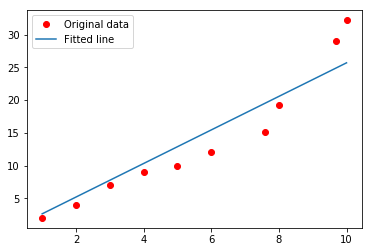

In [3]:
import numpy as np
rng = np.random

import matplotlib.pyplot as plt
learning_rate = 0.0001
training_epochs = 1000
display_step = 50

with tf.Session() as sess:
    x11=sess.run(p)
    y11=sess.run(q)
with tf.name_scope("Plotting"):
    npX= np.asarray(x11)
    npY= np.asarray(y11)
    n_samples = npX.shape[0]
    X1 = tf.placeholder("float")
    Y1 = tf.placeholder("float")

    # Set model weights
    W1 = tf.Variable(rng.randn(), name="weight")
    b2 = tf.Variable(rng.randn(), name="bias")

    # Construct a linear model
    pred = tf.add(tf.multiply(X1, W1), b2)

    # Mean squared error
    cost = tf.reduce_sum(tf.pow(pred-Y1, 2))/(2*n_samples)
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Launch the graph
    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(training_epochs):
            for (a4, a5) in zip(npX, npY):
                sess.run(optimizer, feed_dict={X1: a4, Y1: a5})

            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c2 = sess.run(cost, feed_dict={X1: npX, Y1:npY})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c2), \
                    "W1=", sess.run(W1), "b=", sess.run(b2))

        print("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X1: npX, Y1: npY})
        print("Training cost=", training_cost, "W1=", sess.run(W1), "b2=", sess.run(b2), '\n')

        # Graphic display
        plt.plot(npX, npY, 'ro', label='Original data')
        plt.plot(npX, sess.run(W1) * npX + sess.run(b2), label='Fitted line')
        plt.legend()
        plt.show()

Method 2: Using Numpy and matplotlib

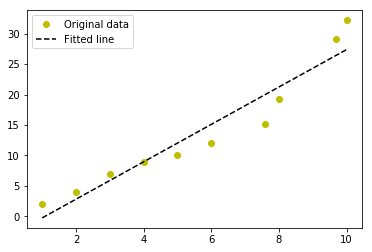

In [7]:
# Graph
GraphFit= np.polyfit(npX,npY,1)
fitFunc= np.poly1d(GraphFit)      # fitFunc is now a function which takes in x and returns an estimate for y

plt.plot(npX,npY, 'yo',label='Original data')
plt.plot(npX,fitFunc(npX), '--k',label='Fitted line')
plt.legend()
plt.show()

 2.Calculate root mean square error.

In [5]:
#RMS Error
with tf.name_scope("Root_Mean_Square_error"):    
    rt_mn_sq_err= tf.sqrt(tf.reduce_mean(tf.squared_difference(p, q)))  #Source: https://stackoverflow.com/a/43830200
    
    with tf.Session() as sess:
        print("Root mean square error=")
        print(sess.run(rt_mn_sq_err))

Root mean square error=
10.7641


$$Assignment 1 End$$